In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Readind the dataset
df = pd.read_csv('winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Checking the null Values.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#Noramalization from MinMaxSacler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
      'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(df[['fixed acidity', 
      'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
      'sulphates', 'alcohol']])

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


In [6]:
# Split the dataset into features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [7]:
# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Initialize the Decision Tree model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [9]:
#Training the model.
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [12]:
train_mse 

np.float64(0.0)

In [13]:
test_mse

np.float64(0.684375)

In [14]:
train_r2

1.0

In [15]:
test_r2

0.054199956812783445

In [16]:
model.predict([[0.65, 0.01, 0.01, 0.15, 0.56, 0.37, 0.45, 0.75, 0.44, 0.23, 0.23]])

C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.])

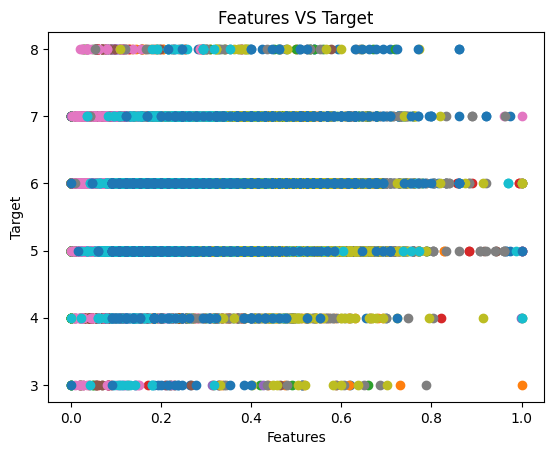

In [17]:
plt.plot(X, y, 'o')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Features VS Target')
plt.show()

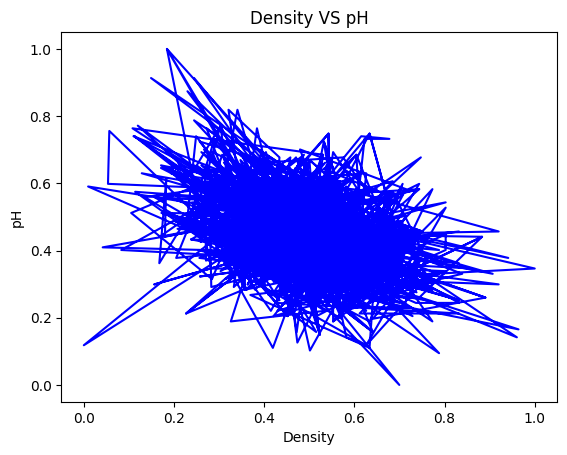

In [18]:
plt.plot(df['density'], df['pH'], 'b')
plt.xlabel('Density')
plt.ylabel('pH')
plt.title('Density VS pH')
plt.show()

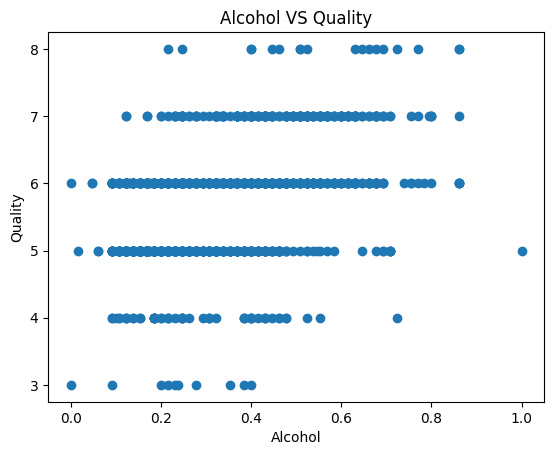

In [19]:
plt.plot(df['alcohol'], df['quality'], 'o')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol VS Quality')
plt.show()